<a href="https://colab.research.google.com/github/AbdulSheffa/Spam-email/blob/main/CW_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing necessary Libraries required**


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import csv
import seaborn as sns
%matplotlib inline


**Loading the dataset**

In [43]:
dataset = pd.read_csv('spambase.data')

In [44]:
dataset

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


**Inserting the column names for the data set as per the instructions **

---




In [45]:
dataset.columns = ['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over','word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$','char_freq_#','capital_run_length_average','capital_run_length_longest','capital_run_length_total','class']
dataset



,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [46]:
dataset.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


**Getting the sum of all the null values for each column**

In [47]:
dataset.isna().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [48]:
dataset = dataset.drop_duplicates()

In [49]:
dataset.shape

(4209, 58)

In [50]:
dataset.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.00000,4209.000000
mean,0.104391,0.112530,0.291390,0.063093,0.325322,0.096679,0.117503,0.108026,0.091882,0.248479,...,0.040413,0.144082,0.017380,0.281018,0.076075,0.045809,5.384282,52.137800,291.18508,0.398670
std,0.300036,0.454241,0.515752,1.352647,0.687887,0.276059,0.397327,0.410328,0.282174,0.656705,...,0.252562,0.274280,0.105743,0.843387,0.239734,0.435976,33.151287,199.605834,618.72831,0.489683
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627000,7.000000,40.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.00000,0.000000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706000,44.000000,273.00000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.00000,1.000000


**Removing the target variable**

In [51]:
# class column contains the detail if the email is spam or not. 1 indicates spam while 0 indicates no-spam
remove_class = dataset.drop(columns=['class'])

In [52]:
remove_class.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.00000
mean,0.104391,0.112530,0.291390,0.063093,0.325322,0.096679,0.117503,0.108026,0.091882,0.248479,...,0.034754,0.040413,0.144082,0.017380,0.281018,0.076075,0.045809,5.384282,52.137800,291.18508
std,0.300036,0.454241,0.515752,1.352647,0.687887,0.276059,0.397327,0.410328,0.282174,0.656705,...,0.298556,0.252562,0.274280,0.105743,0.843387,0.239734,0.435976,33.151287,199.605834,618.72831
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627000,7.000000,40.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.00000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706000,44.000000,273.00000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.00000


**Seperating the target values**

In [53]:
class_column = dataset['class'].values


class_column[0:5]

array([1, 1, 1, 1, 1])

In [54]:
Scaler = StandardScaler()
new_data = Scaler.fit_transform(remove_class)
new_dataset = pd.DataFrame(data=new_data, columns=remove_class.columns)
new_dataset

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.352031,0.368724,0.404526,-0.04665,-0.269440,0.664145,0.232826,-0.092682,-0.325660,1.053140,...,-0.116421,-0.160030,-0.044057,-0.164384,0.107890,0.433554,0.005027,-0.008154,0.244823,1.190995
1,-0.147968,-0.247762,0.811747,-0.04665,1.315311,0.338089,0.182484,0.029186,1.942716,0.002316,...,-0.116421,-0.120431,-0.003947,-0.164384,-0.005950,0.450241,-0.082144,0.133848,2.168843,3.180796
2,-0.347968,-0.247762,-0.565048,-0.04665,0.442971,-0.350251,0.484538,1.272242,0.773085,0.581031,...,-0.116421,-0.160030,-0.025825,-0.164384,-0.170781,-0.317367,-0.105084,-0.055729,-0.060816,-0.161940
3,-0.347968,-0.247762,-0.565048,-0.04665,0.442971,-0.350251,0.484538,1.272242,0.773085,0.581031,...,-0.116421,-0.160030,-0.033118,-0.164384,-0.173153,-0.317367,-0.105084,-0.055729,-0.060816,-0.161940
4,-0.347968,-0.247762,-0.565048,-0.04665,2.216730,-0.350251,-0.295769,4.245828,-0.325660,-0.378418,...,-0.116421,-0.160030,0.287760,-0.164384,-0.333241,-0.317367,-0.105084,-0.071930,-0.186078,-0.383388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0.685363,-0.247762,0.637223,-0.04665,-0.472986,0.772830,-0.295769,-0.263298,-0.325660,-0.378418,...,-0.116421,-0.160030,0.320577,-0.164384,-0.333241,-0.317367,-0.105084,-0.127983,-0.246203,-0.328430
4205,-0.347968,-0.247762,-0.565048,-0.04665,-0.472986,-0.350251,-0.295769,-0.263298,-0.325660,-0.378418,...,-0.116421,-0.160030,-0.525374,-0.164384,0.085359,-0.317367,-0.105084,-0.115523,-0.241193,-0.448045
4206,0.652030,-0.247762,0.016696,-0.04665,-0.472986,-0.350251,-0.295769,-0.263298,-0.325660,-0.378418,...,-0.116421,0.243879,2.092699,-0.164384,-0.333241,-0.317367,-0.105084,-0.120078,-0.231172,-0.279938
4207,2.852026,-0.247762,-0.565048,-0.04665,-0.007738,-0.350251,-0.295769,-0.263298,-0.325660,-0.378418,...,-0.116421,-0.160030,-0.317532,-0.164384,-0.333241,-0.317367,-0.105084,-0.127832,-0.236182,-0.344595


In [55]:
new_dataset.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4.209000e+03,4209.000000,4.209000e+03,4.209000e+03,4.209000e+03,4209.000000,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,...,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03
mean,-2.025781e-17,0.000000,-4.051562e-17,-1.350521e-17,5.402083e-17,0.000000,-2.701042e-17,5.402083e-17,2.701042e-17,1.350521e-17,...,-1.350521e-17,-4.051562e-17,6.752604e-18,2.025781e-17,-4.051562e-17,8.103125e-17,6.752604e-18,2.025781e-17,2.701042e-17,5.402083e-17
std,1.000119e+00,1.000119,1.000119e+00,1.000119e+00,1.000119e+00,1.000119,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,...,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00
min,-3.479680e-01,-0.247762,-5.650479e-01,-4.664991e-02,-4.729856e-01,-0.350251,-2.957690e-01,-2.632980e-01,-3.256596e-01,-3.784178e-01,...,-1.164211e-01,-1.600299e-01,-5.253738e-01,-1.643841e-01,-3.332409e-01,-3.173668e-01,-1.050837e-01,-1.322665e-01,-2.562244e-01,-4.690582e-01
25%,-3.479680e-01,-0.247762,-5.650479e-01,-4.664991e-02,-4.729856e-01,-0.350251,-2.957690e-01,-2.632980e-01,-3.256596e-01,-3.784178e-01,...,-1.164211e-01,-1.600299e-01,-5.253738e-01,-1.643841e-01,-3.332409e-01,-3.173668e-01,-1.050837e-01,-1.133509e-01,-2.261615e-01,-4.060182e-01
50%,-3.479680e-01,-0.247762,-5.650479e-01,-4.664991e-02,-4.729856e-01,-0.350251,-2.957690e-01,-2.632980e-01,-3.256596e-01,-3.784178e-01,...,-1.164211e-01,-1.600299e-01,-2.591909e-01,-1.643841e-01,-3.142675e-01,-3.173668e-01,-1.050837e-01,-9.313814e-02,-1.860778e-01,-3.074171e-01
75%,-3.479680e-01,-0.247762,2.881769e-01,-4.664991e-02,1.231135e-01,-0.350251,-2.957690e-01,-2.632980e-01,-3.256596e-01,-8.906033e-02,...,-1.164211e-01,-1.600299e-01,1.820165e-01,-1.643841e-01,5.927098e-02,-9.626226e-02,-1.050837e-01,-5.063097e-02,-4.077419e-02,-2.939455e-02
max,1.478534e+01,31.193013,9.324604e+00,3.160616e+01,1.406601e+01,20.952071,1.800369e+01,2.681583e+01,1.831755e+01,2.730852e+01,...,3.338210e+01,1.720410e+01,3.503375e+01,3.843384e+01,3.818036e+01,2.472585e+01,4.538220e+01,3.309814e+01,4.978834e+01,2.513488e+01


**Principal Component Analysis**

In [56]:
from sklearn.decomposition import PCA

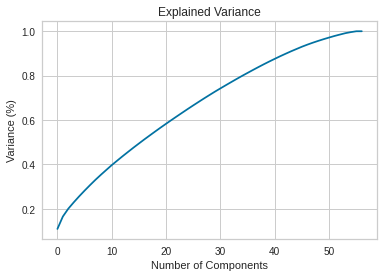

In [57]:
principal_component_analysis = PCA()
principal_components = principal_component_analysis.fit_transform(new_dataset)
plt.figure()
plt.plot(np.cumsum(principal_component_analysis.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [58]:
# it is visible that 90% of variance is observed between 40 to 50 number of principal components
principal_component_analysis = PCA(n_components=45)
final_data = principal_component_analysis.fit_transform(new_dataset)
principal_data = pd.DataFrame(data=final_data, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9',
                                                        'PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18',
                                                        'PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27',
                                                        'PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36',
                                                        'PC37','PC38','PC39','PC40','PC41','PC42','PC43','PC44','PC45'])
principal_data


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45
0,-1.293656,2.006819,0.071216,-0.481164,-0.099237,-1.117777,-0.544570,0.252036,-0.307817,-0.631063,...,-0.119454,-0.478723,-0.185076,0.128189,0.074803,0.246355,0.541814,0.015667,0.314900,0.065214
1,-1.612839,4.821030,3.136799,-1.074313,1.592348,-1.498899,-3.174365,-1.399751,1.027034,2.520413,...,-0.014827,-0.729703,-0.284551,-0.310579,0.944113,0.854697,0.549173,0.311371,-0.751694,0.559955
2,-0.857356,0.414018,-0.551731,-0.030979,-0.050533,0.702448,0.339818,-0.444561,-0.365736,0.183246,...,-0.071703,0.056213,0.261011,-0.308771,0.479728,0.798390,-0.630974,0.342158,-0.307584,-0.452397
3,-0.858210,0.413351,-0.553856,-0.031238,-0.050564,0.703063,0.338072,-0.445841,-0.366080,0.182840,...,-0.071689,0.057866,0.261497,-0.308783,0.480169,0.797595,-0.629582,0.342025,-0.306584,-0.452121
4,-0.496912,-0.506515,-0.353618,0.492896,0.358022,1.201272,0.406471,-1.056179,-0.752151,1.234325,...,-0.288108,0.271838,0.082745,0.194530,1.864286,1.108729,-1.262878,0.956487,0.163452,-0.143678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,-0.442848,-0.886749,-0.100398,0.567858,0.225363,-0.788717,0.143060,-0.209661,-0.078911,-0.130102,...,0.191156,0.135776,-0.482234,-0.079506,0.186411,-0.588441,-0.349762,0.220381,-0.147874,0.262573
4205,-0.806761,-0.660539,-1.122707,-0.493332,-1.024727,-0.528523,0.880823,0.773876,-0.552002,0.641513,...,-0.770628,0.504570,0.431161,0.887465,-1.209565,0.658705,0.511234,0.405668,-0.219385,-0.033310
4206,-0.276050,-0.567534,0.359749,0.162792,-0.019360,-0.954677,0.269515,0.332010,0.243811,0.222467,...,-0.011703,0.011865,-0.608782,0.451776,-0.643699,-0.386486,-0.984521,0.383333,-0.235403,0.042318
4207,-0.585895,-0.749530,-0.464961,0.290635,-0.277674,-0.760598,0.432822,0.115585,-0.367368,-0.615084,...,-0.696290,-0.146457,0.303672,-0.020300,-0.363926,0.698155,-0.394312,0.196058,0.206161,-0.082790


In [59]:
x_set = principal_data.iloc[:,0:45].values
y_set = dataset.iloc[:,57].values

**Training the KNN model**

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_set,y_set, test_size=0.30, random_state=42)
print(f"X Training: {x_train}\n X Test: {x_test}\n Y Train: {y_train}\n Y Test: {y_test}")

X Training: [[-0.77570348 -0.14860132 -0.63422683 ... -0.14073047  0.54732666
  -0.21370241]
 [ 0.12276061 -0.63465847 -1.20902699 ...  0.64648381  0.0311122
   0.52149972]
 [ 2.07880811 -1.19685301  0.05693653 ...  1.24633097 -0.91042989
  -0.01486926]
 ...
 [ 0.97283468 -4.26139617  3.40818825 ... -1.52305728 -0.38998469
   0.79285772]
 [-0.45728469 -1.03274134  0.03743643 ...  0.15775801 -0.4105283
   0.24088733]
 [-1.10297133  0.96276535 -1.19952755 ...  0.12502203  0.54736222
   0.6422511 ]]
 X Test: [[-0.47909999 -0.899018   -0.10926542 ... -0.9155357  -0.69141222
   0.21045175]
 [-0.77055968  1.13980974 -0.8911983  ... -1.01534679 -0.43108244
   0.3687928 ]
 [-0.14707472 -1.41218278  0.36005029 ... -0.57857893 -0.33140658
  -0.05161808]
 ...
 [-0.20285137 -3.97096364  2.61188601 ...  6.04734668 -2.05510255
   7.39671482]
 [-1.10221446  0.94050915 -1.31740237 ... -0.12969148  0.19295094
   0.58923999]
 [ 0.57309112 -0.4644301  -0.13659551 ...  0.22238413  1.15560737
   0.35724922

In [61]:
# feature scalling
featureScalling = StandardScaler()
x_train = featureScalling.fit_transform(x_train)
x_test = featureScalling.transform(x_test)

In [62]:
# fitting the classifier to the training set
# k is considered as 5
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [63]:
#predicting test results
predicted_y = classifier.predict(x_test)

**Classification report for the KNN model**

In [64]:
from sklearn.metrics import classification_report
print("Below is the classifcation report: ")
print(classification_report(y_test,predicted_y))

Below is the classifcation report: 
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       740
           1       0.90      0.80      0.85       523

    accuracy                           0.88      1263
   macro avg       0.89      0.87      0.88      1263
weighted avg       0.88      0.88      0.88      1263



In [65]:
from sklearn.metrics import confusion_matrix
ConfusionMatrix = confusion_matrix(y_test, predicted_y)
ConfusionMatrix

array([[696,  44],
       [105, 418]])

**Visualizing the confusion Matrix**

Text(91.68, 0.5, 'predicted class')

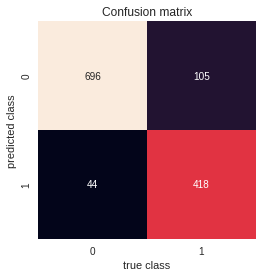

In [66]:
import seaborn as sns

Matrix = confusion_matrix(y_test, predicted_y)
sns.heatmap(Matrix.T, square=True, annot=True, fmt='d', cbar=False)

plt.title('Confusion matrix')
plt.xlabel('true class')
plt.ylabel('predicted class')

**Accuracy of the model in %**

In [67]:
from sklearn.metrics import accuracy_score
print("Using KNN model the accuracy is : ",accuracy_score(predicted_y,y_test)*100)

Using KNN model the accuracy is :  88.20269200316706


**Decision Tree**

In [68]:
x_set = principal_data.iloc[:,0:45].values
y_set = dataset.iloc[:,57].values

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_set,y_set, test_size=0.30, random_state=42)
print(f"X Training: {x_train}\n X Test: {x_test}\n Y Train: {y_train}\n Y Test: {y_test}")

X Training: [[-0.77570348 -0.14860132 -0.63422683 ... -0.14073047  0.54732666
  -0.21370241]
 [ 0.12276061 -0.63465847 -1.20902699 ...  0.64648381  0.0311122
   0.52149972]
 [ 2.07880811 -1.19685301  0.05693653 ...  1.24633097 -0.91042989
  -0.01486926]
 ...
 [ 0.97283468 -4.26139617  3.40818825 ... -1.52305728 -0.38998469
   0.79285772]
 [-0.45728469 -1.03274134  0.03743643 ...  0.15775801 -0.4105283
   0.24088733]
 [-1.10297133  0.96276535 -1.19952755 ...  0.12502203  0.54736222
   0.6422511 ]]
 X Test: [[-0.47909999 -0.899018   -0.10926542 ... -0.9155357  -0.69141222
   0.21045175]
 [-0.77055968  1.13980974 -0.8911983  ... -1.01534679 -0.43108244
   0.3687928 ]
 [-0.14707472 -1.41218278  0.36005029 ... -0.57857893 -0.33140658
  -0.05161808]
 ...
 [-0.20285137 -3.97096364  2.61188601 ...  6.04734668 -2.05510255
   7.39671482]
 [-1.10221446  0.94050915 -1.31740237 ... -0.12969148  0.19295094
   0.58923999]
 [ 0.57309112 -0.4644301  -0.13659551 ...  0.22238413  1.15560737
   0.35724922

In [70]:
from sklearn.tree import DecisionTreeClassifier
classifier_decision_tree = DecisionTreeClassifier(random_state=45,max_depth=5)
classifier_decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=45)

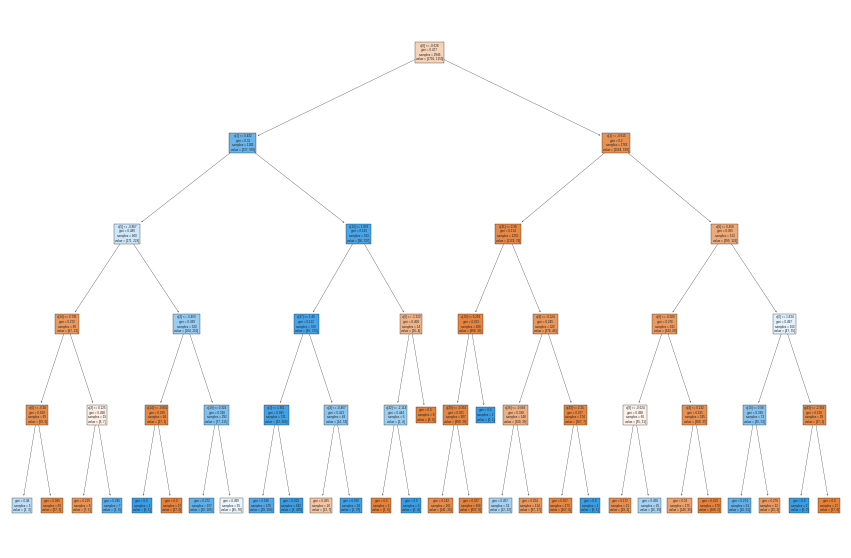

In [71]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier_decision_tree,filled=True)
plt.show()

In [72]:
prediction = classifier_decision_tree.predict(x_test)
prediction

array([0, 1, 0, ..., 0, 1, 0])

In [73]:
from sklearn.metrics import classification_report
print("Below is the classifcation report: ")
print(classification_report(y_test,prediction))

Below is the classifcation report: 
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       740
           1       0.84      0.87      0.85       523

    accuracy                           0.88      1263
   macro avg       0.87      0.87      0.87      1263
weighted avg       0.88      0.88      0.88      1263



In [74]:
from sklearn.metrics import confusion_matrix
print("Below is the confusion matrix: ")
Confusion_Matrix = confusion_matrix(y_test, prediction)
Confusion_Matrix

Below is the confusion matrix: 


array([[653,  87],
       [ 70, 453]])

**Visualizing the confusion matrix**

Text(91.68, 0.5, 'Predicted Class')

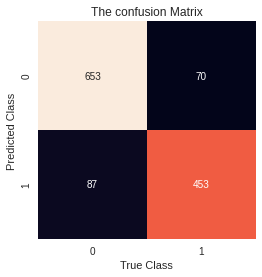

In [75]:
sns.heatmap(Confusion_Matrix.T, square=True, annot=True, fmt='d', cbar=False)
plt.title("The confusion Matrix")
print("")
plt.xlabel("True Class")
plt.ylabel("Predicted Class")

**Accuracy of the model in %**

In [76]:
from sklearn.metrics import accuracy_score
print("Using Decision Trees model the accuracy is : ",accuracy_score(prediction,y_test)*100)

Using Decision Trees model the accuracy is :  87.56927949326999
